<a href="https://colab.research.google.com/github/ilyes-frag/100-Prisoner-Riddle-Simulation/blob/main/100_prisoners_problem_solved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **100 prisoners problem**

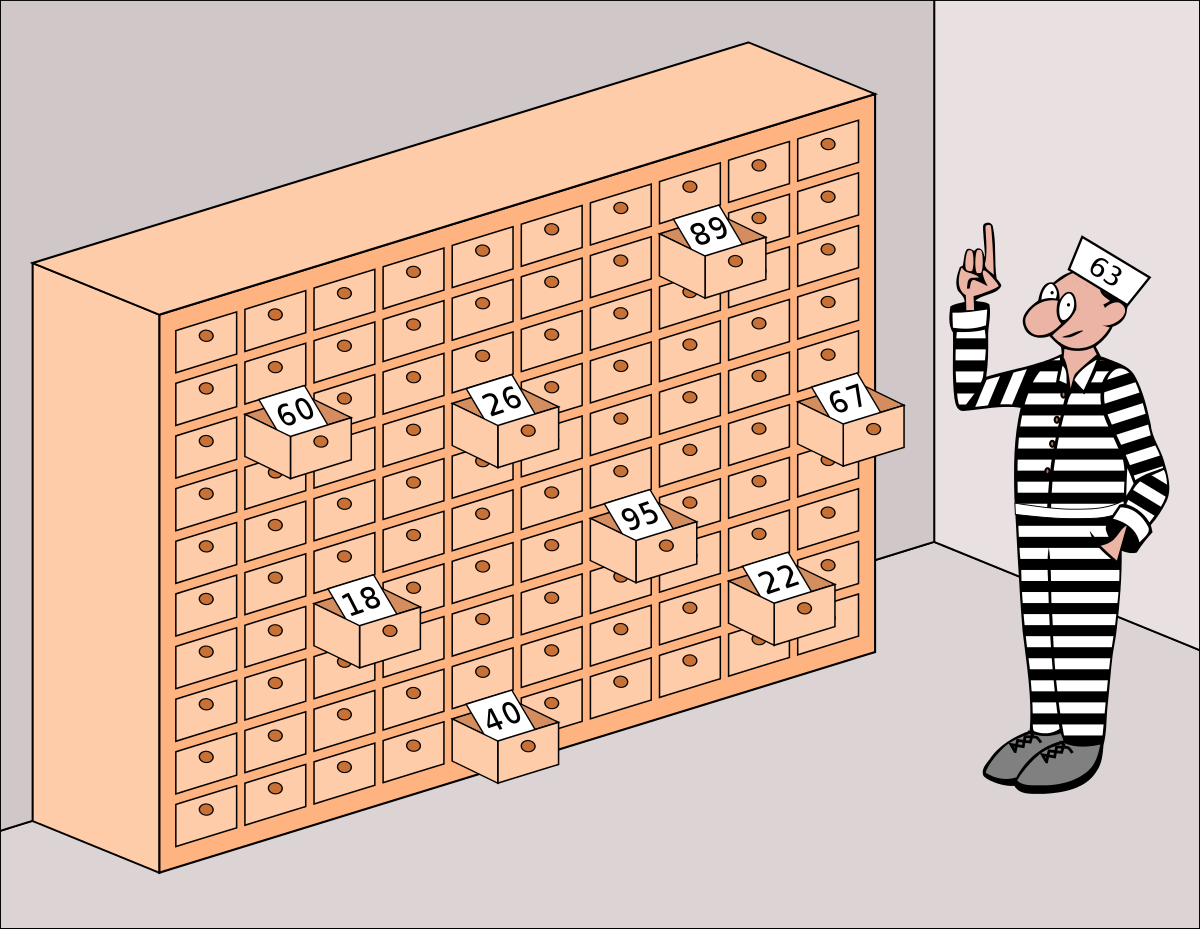


The director of a prison offers 100 death row prisoners, who are numbered from 1 to 100, a last chance.

  - A room contains a cupboard with 100 drawers.
  - The director randomly puts one prisoner's number in each closed drawer.
  - The prisoners enter the room, one after another. Each prisoner may open     and look into 50 drawers in any order.

  - The drawers are closed again afterwards.

To Succeed:

1- Every prisoner finds their number in one of the drawers, all prisoners are pardoned.

2- If just one prisoner does not find their number, all prisoners lose.

Before the first prisoner enters the room, the prisoners may discuss strategy — but may not communicate once the first prisoner enters to look in the drawers. What is the prisoners' best strategy?

In [1]:
# import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import networkx as nx 
from tqdm import trange 
plt.style.use("ggplot")
color_pal=sns.color_palette(n_colors=50)


In [2]:
# creat shuffle function that return diferent value for the boxe in every time we run this  
def shuffle_boxes():

  prisoner_numbers = [x for x in range(0, 100)]
  boxes = {}
  np.random.shuffle(prisoner_numbers)
  for i, p in enumerate(prisoner_numbers):

    boxes[i] = p
  return boxes

PRISONERS = [x for x in range(0, 100)]
BOX_NUMBERS = [x for x in range(0, 100)]

 ## **1- Random Choice Strategy** 

In [3]:
def random_strategy(prisoner_number, boxes):
    """
    Randomly select 50 boxes for the prisoner.

    Returns True if they found their number, False if they did not
    """
    prisoner_choices = np.random.choice(BOX_NUMBERS, size=50, replace=False)
    for choice in prisoner_choices:
        if boxes[choice] == prisoner_number:
            return True
    return False

In [4]:
def try_strategy(boxes, strategy):
    n_correct = 0
    for prisoner in PRISONERS:
        correct = strategy(prisoner_number=prisoner, boxes=boxes)
        if correct:
            n_correct += 1
    return n_correct

In [5]:
# let's run this for 5000 times and see the results 
results = {}
for sim in trange(5_000):
    boxes = shuffle_boxes()
    n_correct = 0
    for prisoner in PRISONERS:
        correct = random_strategy(prisoner_number=prisoner, boxes=boxes)
        if correct:
            n_correct += 1
    results[sim] = n_correct

100%|██████████| 5000/5000 [00:25<00:00, 195.82it/s]


In [6]:
try_strategy  (boxes , random_strategy)

47

In [7]:
result_random=pd.DataFrame.from_dict(results, orient="index", columns=['n_correct'] )

In [8]:
result_random['n_correct'].mean(), result_random['n_correct'].std()

(50.0018, 4.962531824020969)

In [9]:
result_random

,n_correct
0,53
1,59
2,45
3,62
4,57
...,...
4995,43
4996,42
4997,46
4998,48


### creat some plots to see better the results 

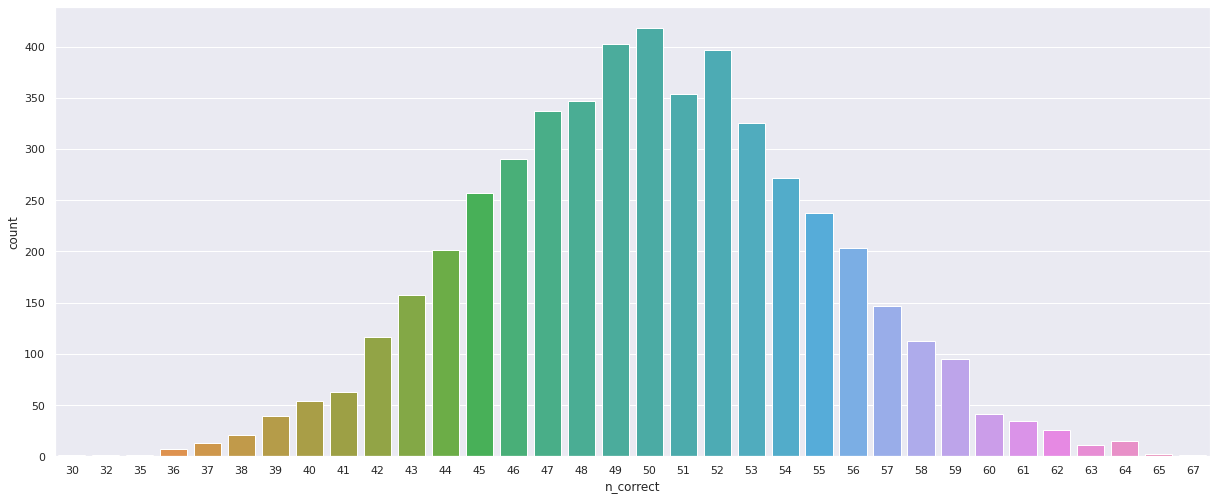

In [36]:
sns.countplot(data=result_random,x='n_correct')
sns.set(rc={'figure.figsize':(20.7,8.27)})


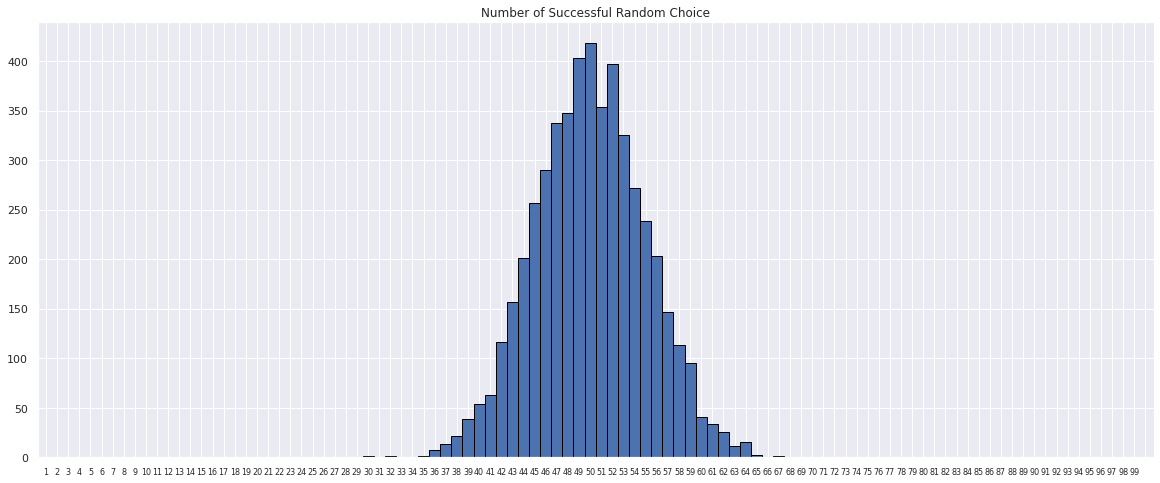

In [11]:
results_agg = pd.DataFrame(index=range(1, 101))
results_agg["counts"] = results_agg.index.map(
    result_random["n_correct"].value_counts().to_dict()
).fillna(0)

ax = results_agg.plot(
    kind="bar",
    figsize=(20, 8),
    width=1,
    lw=1,
    edgecolor="black",
    title="Number of Successful Random Choice",
)

ax.set_xticklabels(ax.get_xticks(), rotation=0, size=8)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(120))
ax.legend().remove()

plt.show()

as we can see when the prisoners try the random choise they always failed  let's now try the LOOP STRATEGY 

 # **2- Loop Strategy**
 - start with the box that's their own number
 - Select the next box based on the number in the last chosex box 

In [17]:
def loop_strategy(prisoner_number, boxes):
    """
    Select 50 boxes starting with their own number,
    next selecting the results from the last box and so on.

    Returns True if they found their number, False if they did not
    """
    next_box = prisoner_number
    for x in range(50):
        if boxes[next_box] == prisoner_number:
            return True
        next_box = boxes[next_box]
    return False

In [18]:
def try_strategy(boxes, strategy):
    n_correct = 0
    for prisoner in PRISONERS:
        correct = strategy(prisoner_number=prisoner, boxes=boxes)
        if correct:
            n_correct += 1
    return n_correct


In [19]:
results = {}
for sim in trange(5_000):
    boxes = shuffle_boxes()
    n_correct = 0
    for prisoner in PRISONERS:
        correct = loop_strategy(prisoner_number=prisoner, boxes=boxes)
        if correct:
            n_correct += 1
    results[sim] = n_correct
# Create Dataframe with results
results_loop = pd.DataFrame.from_dict(results, orient="index", columns=["ncorrect"])

100%|██████████| 5000/5000 [00:01<00:00, 2573.84it/s]


In [34]:
try_strategy(boxes, loop_strategy)

41

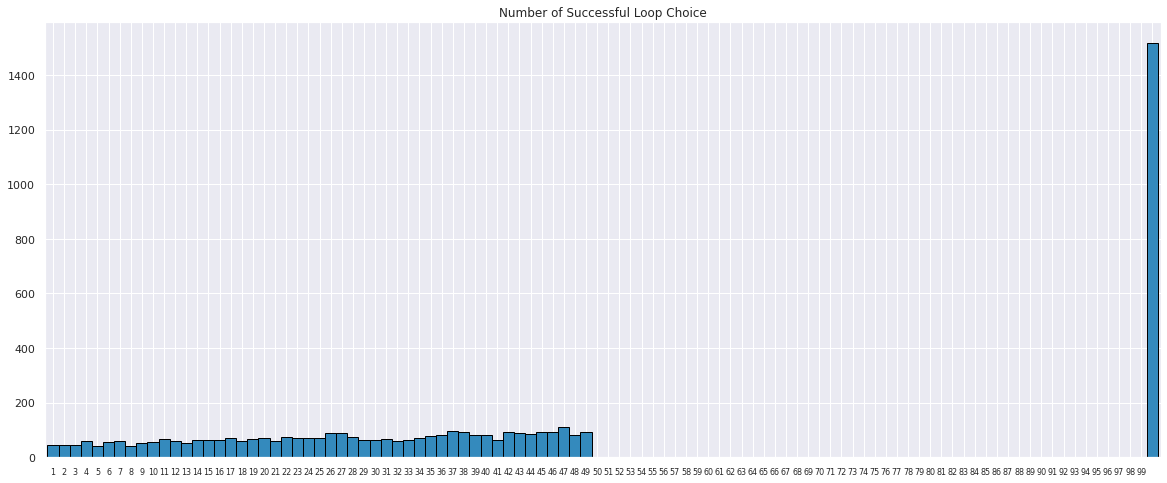

In [35]:
results_agg = pd.DataFrame(index=range(0, 100))
results_agg.index += 1

results_agg["counts"] = results_agg.index.map(
    results_loop["ncorrect"].value_counts().to_dict()
).fillna(0)

ax = results_agg.plot(
    kind="bar",
    color=color_pal[1],
    figsize=(20, 8),
    width=1,
    lw=1,
    edgecolor="black",
    title="Number of Successful Loop Choice",
)

ax.set_xticklabels(ax.get_xticks(), rotation=0, size=8)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(120))
ax.legend().remove()

plt.show()